In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem.wordnet import WordNetLemmatizer
stopwords=set(stopwords.words('romanian'))
from nltk.tokenize import word_tokenize
import gensim
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
nltk.download([
...     "names",
...     "stopwords",
...     "state_union",
...     "twitter_samples",
...     "movie_reviews",
...     "averaged_perceptron_tagger",
...     "vader_lexicon",
...     "punkt",
... ])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_d

True

In [4]:
from gensim.models import Word2Vec

In [5]:
from collections import defaultdict
from collections import  Counter
import re
import string
plt.style.use('ggplot')

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
df = pd.read_excel(r'C:\Users\Zoe\Desktop\Disertatie\Coduri\PM_RI cu etichete.xlsx')

In [9]:

df['year'] = pd.DatetimeIndex(df['Data']).year
df['month'] = pd.DatetimeIndex(df['Data']).month
df['month_year'] = pd.to_datetime(df['Data']).dt.to_period('M')
df.head()
df['date'] =  pd.to_datetime(df['Data']).dt.strftime('%Y-%m-%d')

In [10]:
df.head()

,Data,Header,Text,RI,RID,Directie,year,month,month_year,date
0,2005-01-17,Consiliul de administratie al BNR a hotarat re...,"in sedinta sa din 14-15 ianuarie 2005, Consili...",8.9,-0.4,s,2005,1,2005-01,2005-01-17
1,2005-02-12,Consiliul de Administratie al Bancii Nationale...,"in sedinta din 10 februarie 2005, Consiliul de...",8.7,-0.2,s,2005,2,2005-02,2005-02-12
2,2005-03-14,Consiliul de Administratie al Bancii Nationale...,"in sedinta din 12 martie 2005, Consiliul de Ad...",10.0,1.3,c,2005,3,2005-03,2005-03-14
3,2005-04-08,NaN,"in sedinta sa din 7 aprilie 2005, Consiliul de...",9.3,-0.7,s,2005,4,2005-04,2005-04-08
4,2005-07-08,Consiliul de Administratie al Bancii Nationale...,"in sedinta din 8 iulie 2005, Consiliul de Admi...",8.9,-0.4,s,2005,7,2005-07,2005-07-08


In [11]:
def remove_string(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = remove_string(dataset[column], regex)
    return dataset

def get_regex_list():
    '''
    add here expressions you want to filter out
    '''
    regexList = []
    regexList += ['[^a-zA-z 0-9]+']
    regexList += ['[0-9]']
    regexList += ['https?:[^\]\n\r]+']
    regexList += ['http?:[^\]\n\r]+']
    regexList += ['co?:[^\]\n\r]+']
    regexList += ["  "]
    regexList += ['http']
    return regexList

In [12]:
def preprocess(text):
    result = []
    for x in gensim.utils.simple_preprocess(text,min_len=3, max_len=13):
        if x not in stopwords:
            result.append(x)     
    return result

In [13]:
def get_lemma(word):
    return WordNetLemmatizer().lemmatize(word)

In [14]:
def prepare_text(tokens):
    tokens = [get_lemma(token) for token in tokens]
    return ' '.join(tokens)

In [15]:
def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

In [16]:
import time
from sklearn.feature_extraction.text import CountVectorizer


def count_vect_feature(feature, df, max_features=5000):
    start_time = time.time()
    cv = CountVectorizer(max_features=max_features,
                             ngram_range=(1, 1),
                             stop_words=stopwords)
    X_feature = cv.fit_transform(df[feature])
    print('Count Vectorizer `{}` completed in {} sec.'.format(feature, round(time.time() - start_time,2)))
    return X_feature, cv

In [17]:
X_text, cv = count_vect_feature('Text', df)

Count Vectorizer `Text` completed in 0.14 sec.


C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['printr'] not in stop_words.
  warnings.warn(


In [18]:
regex_list = get_regex_list()
x = cleanDataset(df, ['Text'],regex_list)


C:\Users\Zoe\AppData\Local\Temp\ipykernel_14684\1815370050.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  return data.str.lower().str.replace(regex.lower(), ' ')


In [19]:
df['prep_text'] = x['Text'].apply(lambda y:preprocess(y))
df['prep_text'] = df['prep_text'].apply(lambda y:prepare_text(y))
df['prep_text']

0      sedinta ianuarie consiliul administratie banci...
1      sedinta februarie consiliul administratie banc...
2      sedinta martie consiliul administratie bancii ...
3      sedinta aprilie consiliul administratie bancii...
4      sedinta iulie consiliul administratie bancii n...
                             ...                        
137    rata anuala inflatiei ajuns suta august margin...
138    consiliul administratie bancii nationale roman...
139    rata anuala inflatiei ajuns noiembrie suta niv...
140    membri consiliului administra ncii ionale rom ...
141    membri consiliului administra ncii ionale rom ...
Name: prep_text, Length: 142, dtype: object

In [20]:
df.head()

,Data,Header,Text,RI,RID,Directie,year,month,month_year,date,prep_text
0,2005-01-17,Consiliul de administratie al BNR a hotarat re...,in sedinta sa din ianuarie consiliul de ...,8.9,-0.4,s,2005,1,2005-01,2005-01-17,sedinta ianuarie consiliul administratie banci...
1,2005-02-12,Consiliul de Administratie al Bancii Nationale...,in sedinta din februarie consiliul de admi...,8.7,-0.2,s,2005,2,2005-02,2005-02-12,sedinta februarie consiliul administratie banc...
2,2005-03-14,Consiliul de Administratie al Bancii Nationale...,in sedinta din martie consiliul de adminis...,10.0,1.3,c,2005,3,2005-03,2005-03-14,sedinta martie consiliul administratie bancii ...
3,2005-04-08,NaN,in sedinta sa din aprilie consiliul de adm...,9.3,-0.7,s,2005,4,2005-04,2005-04-08,sedinta aprilie consiliul administratie bancii...
4,2005-07-08,Consiliul de Administratie al Bancii Nationale...,in sedinta din iulie consiliul de administ...,8.9,-0.4,s,2005,7,2005-07,2005-07-08,sedinta iulie consiliul administratie bancii n...


In [21]:
def sentimentScore(text):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

In [22]:
df_results = pd.DataFrame(sentimentScore(df['prep_text']))
df=pd.merge(df, df_results, left_index=True, right_index=True)
df.set_index('month_year', inplace=True)

In [23]:
df['polarity']=(df.pos-df.neg)/(df.pos+df.neg)

In [24]:
#df.index = pd.to_datetime(df.index)
sentiment=df['compound']#.resample("M").mean()
polarity=df['polarity']#.resample("M").mean()

In [25]:
df = df.fillna(0)

In [26]:
df.head()

,Data,Header,Text,RI,RID,Directie,year,month,date,prep_text,neg,neu,pos,compound,polarity
month_year,,,,,,,,,,,,,,,
2005-01,2005-01-17,Consiliul de administratie al BNR a hotarat re...,in sedinta sa din ianuarie consiliul de ...,8.9,-0.4,s,2005,1,2005-01-17,sedinta ianuarie consiliul administratie banci...,0.000,0.986,0.014,0.3818,1.000000
2005-02,2005-02-12,Consiliul de Administratie al Bancii Nationale...,in sedinta din februarie consiliul de admi...,8.7,-0.2,s,2005,2,2005-02-12,sedinta februarie consiliul administratie banc...,0.006,0.979,0.015,0.5106,0.428571
2005-03,2005-03-14,Consiliul de Administratie al Bancii Nationale...,in sedinta din martie consiliul de adminis...,10.0,1.3,c,2005,3,2005-03-14,sedinta martie consiliul administratie bancii ...,0.010,0.970,0.020,0.4215,0.333333
2005-04,2005-04-08,0,in sedinta sa din aprilie consiliul de adm...,9.3,-0.7,s,2005,4,2005-04-08,sedinta aprilie consiliul administratie bancii...,0.000,0.982,0.018,0.6124,1.000000
2005-07,2005-07-08,Consiliul de Administratie al Bancii Nationale...,in sedinta din iulie consiliul de administ...,8.9,-0.4,s,2005,7,2005-07-08,sedinta iulie consiliul administratie bancii n...,0.002,0.966,0.032,0.9313,0.882353


In [27]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
import pydotplus
from six import StringIO  
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
import xlsxwriter
import os

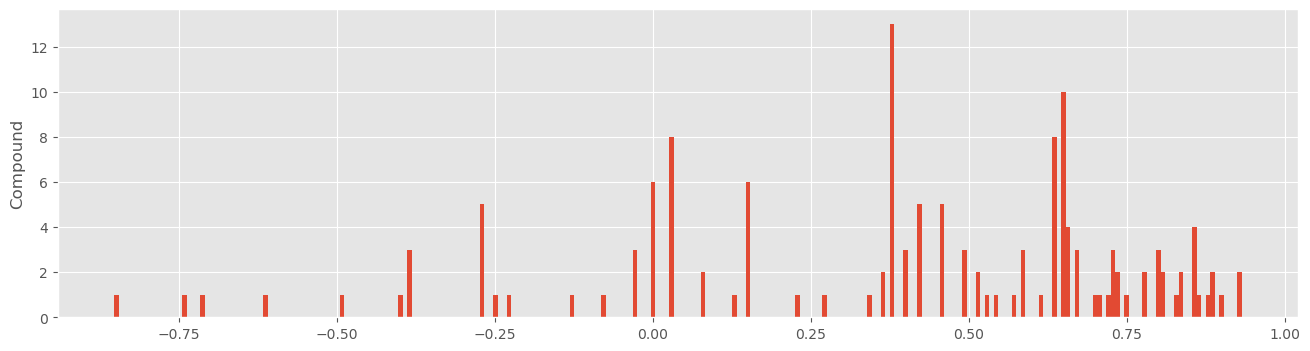

In [28]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
x = df['compound'] 
plt.hist(x,  bins=250)
plt.ylabel('Compound'); 

In [103]:
x = np.array(df[['compound']]) #
y = np.array(df['Directie'])

# from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### KNN - K-Nearest-Neighbors

In [104]:
y_train

array(['s', 'c', 'c', 's', 's', 's', 'c', 's', 's', 'c', 's', 'c', 'c',
       's', 's', 's', 's', 'c', 'c', 's', 'c', 's', 's', 'c', 'c', 'c',
       's', 'c', 's', 'c', 'c', 'c', 's', 'c', 'c', 'c', 's', 'c', 's',
       'c', 'c', 'c', 's', 's', 'c', 'c', 'c', 's', 's', 'c', 's', 'c',
       's', 's', 's', 'c', 'c', 's', 's', 'c', 's', 's', 's', 'c', 's',
       's', 'c', 'c', 'c', 'c', 's', 's', 'c', 's', 'c', 's', 's', 's',
       'c', 'c', 'c', 'c', 'c', 'c', 's', 'c', 'c', 's', 's', 's', 'c',
       'c', 's', 'c', 'c', 'c', 'c', 'c', 's', 's', 'c', 's', 's', 's',
       'c', 's', 's', 'c', 's', 's', 's', 's', 'c'], dtype=object)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train) 
neigh.score( x_test, y_test)

C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5172413793103449

In [31]:
neigh.score(x_train, y_train)

C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6991150442477876

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [33]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [102]:
labels = ['c', 's'] 

In [36]:
y_pred = neigh.predict(x_train)

C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


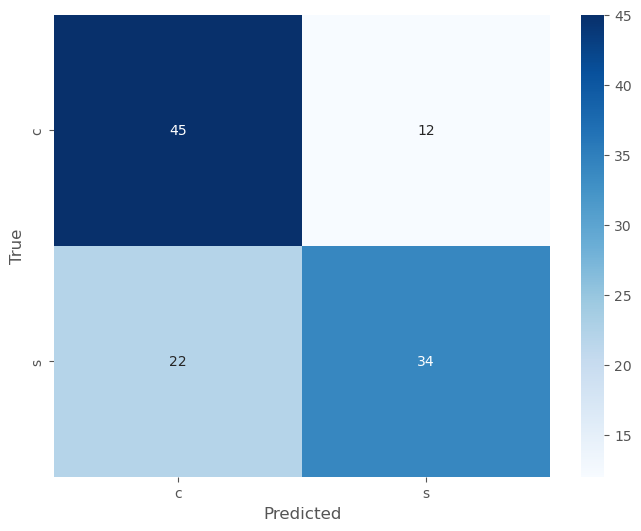

In [37]:
plot_confusion_matrix(y_train, y_pred, labels)

In [38]:
y_pred = neigh.predict(x_test)

C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


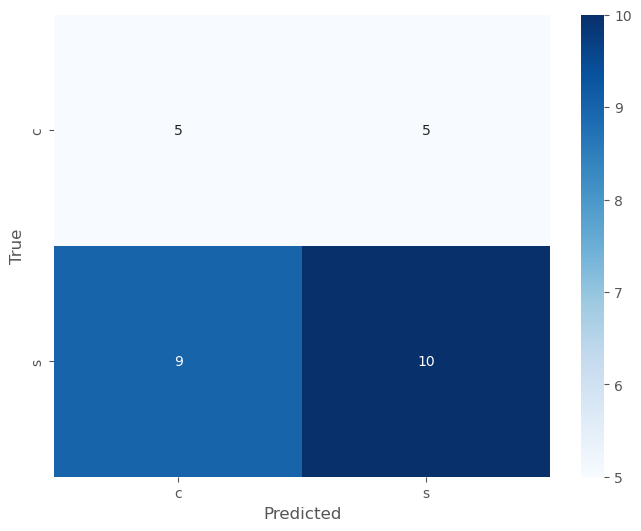

In [39]:
plot_confusion_matrix(y_test, y_pred, labels)

In [40]:
neigh_cv = cross_val_score(neigh, x_train, y_train, cv=10) 
print(neigh_cv.mean()) 

0.47727272727272724


C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

In [41]:
neigh_cv = cross_val_score(neigh, x_test, y_test, cv=10) 
print(neigh_cv.mean()) 

0.4333333333333333


C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
logreg.score( x_test, y_test)

0.6206896551724138

In [43]:
logreg.score(x_train, y_train)

0.49557522123893805

In [44]:
y_pred = logreg.predict(x_train)

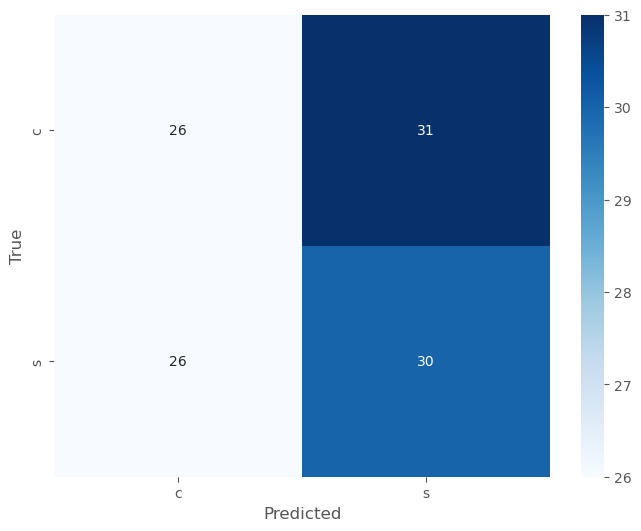

In [45]:
plot_confusion_matrix(y_train, y_pred, labels)

In [46]:
y_pred = logreg.predict(x_test)

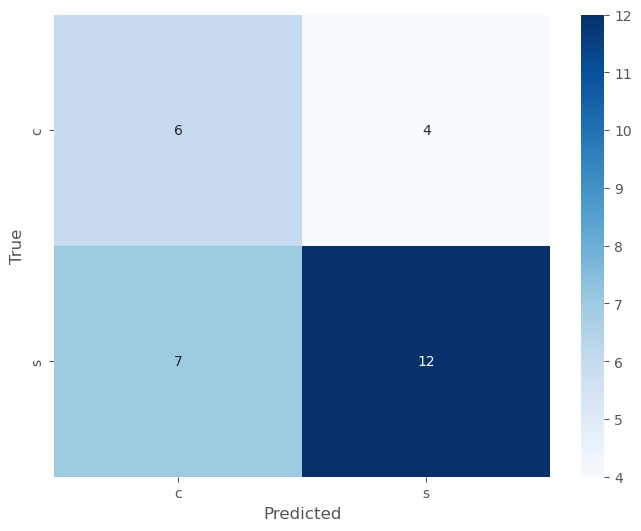

In [47]:
plot_confusion_matrix(y_test, y_pred, labels)

In [48]:
logreg_cv = cross_val_score(logreg, x_train, y_train, cv=10)
print(logreg_cv.mean())

0.5022727272727273


In [49]:
logreg_cv = cross_val_score(logreg, x_test, y_test, cv=10)
print(logreg_cv.mean())

0.65


Support Vector Machines (SVM) with linear kernel

In [50]:
from sklearn.svm import SVC

svm_linear = SVC( kernel = 'linear')
svm_linear.fit(x_train, y_train)
svm_linear.score(x_test, y_test)

0.6551724137931034

In [51]:
svm_linear.score(x_train, y_train)

0.5398230088495575

In [52]:
y_pred_train = svm_linear.predict(x_train)
y_pred_test = svm_linear.predict(x_test)

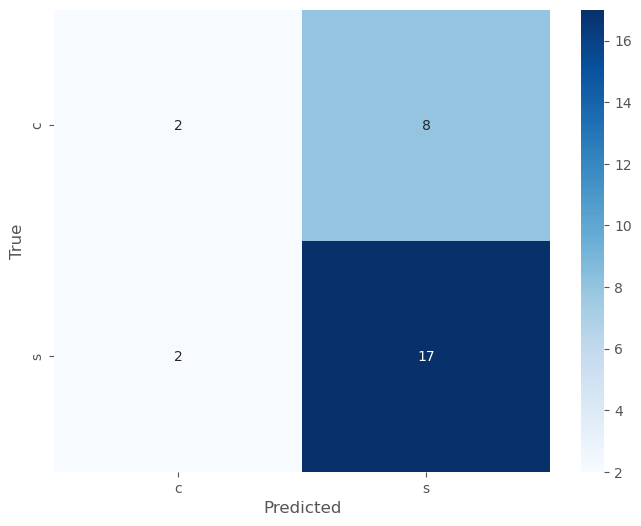

In [53]:
plot_confusion_matrix(y_test, y_pred_test, labels)

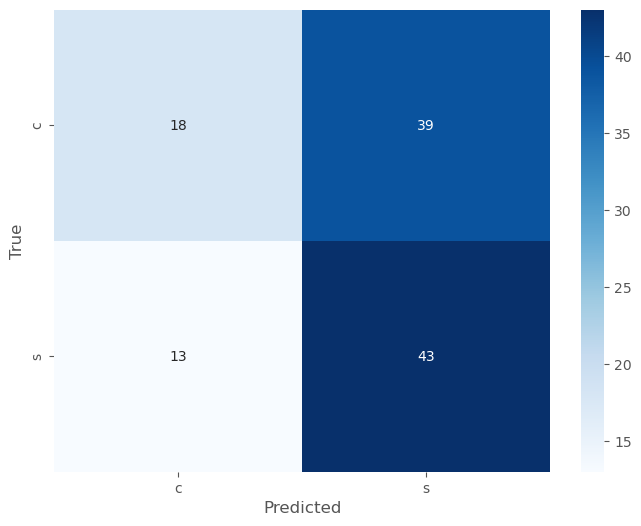

In [54]:
plot_confusion_matrix(y_train, y_pred_train, labels)

In [55]:
svm_linear_cv = cross_val_score(svm_linear, x_train, y_train, cv=10)
print(svm_linear_cv.mean())

0.45984848484848484


In [56]:
svm_linear_cv = cross_val_score(svm_linear, x_test, y_test, cv=10)
print(svm_linear_cv.mean())

0.65


Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_minmax = scaler.fit_transform(x_train)
X_minmax_test = scaler.fit_transform(x_test)
mnb = MultinomialNB()
mnb.fit(X_minmax, y_train)

MultinomialNB()

In [58]:
mnb.score(X_minmax_test, y_test)

0.3448275862068966

In [59]:
mnb.score(X_minmax, y_train)

0.504424778761062

In [60]:
y_pred_train = mnb.predict(X_minmax)
y_pred_test = mnb.predict(X_minmax_test)

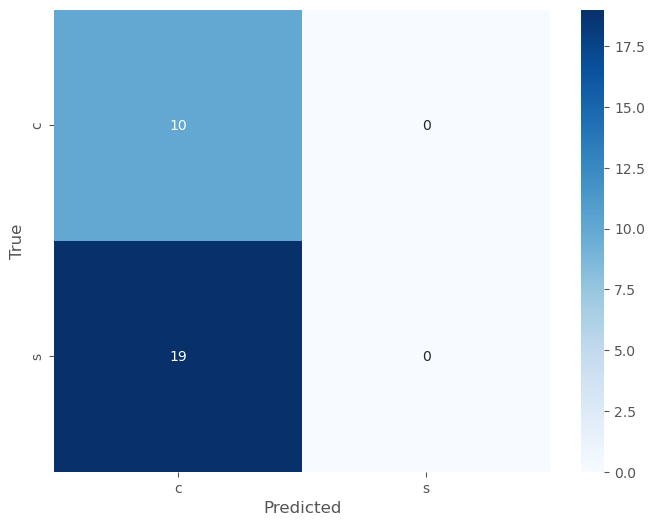

In [61]:
plot_confusion_matrix(y_test, y_pred_test, labels)

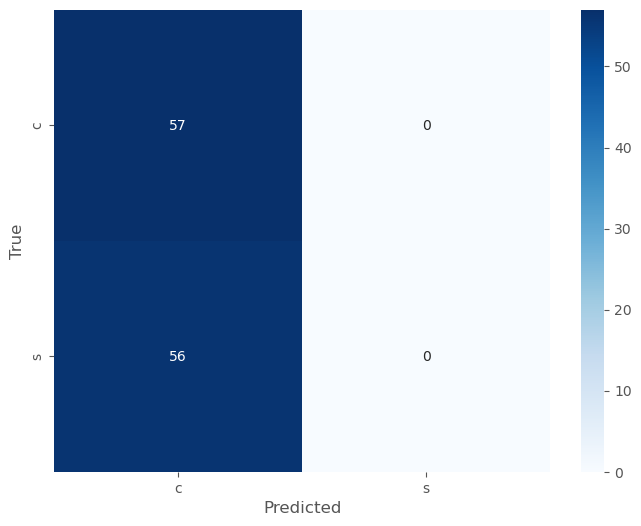

In [62]:
plot_confusion_matrix(y_train, y_pred_train, labels)

In [63]:
mnb_cv = cross_val_score(mnb, X_minmax, y_train, cv=10) 
print(mnb_cv.mean())

0.5045454545454545


In [64]:
mnb_cv = cross_val_score(mnb, X_minmax_test, y_test, cv=10) 
print(mnb_cv.mean())

0.65


Decision Tree

In [65]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train) 
dtc.score(x_test, y_test)
dtc

DecisionTreeClassifier(random_state=42)

In [66]:
y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

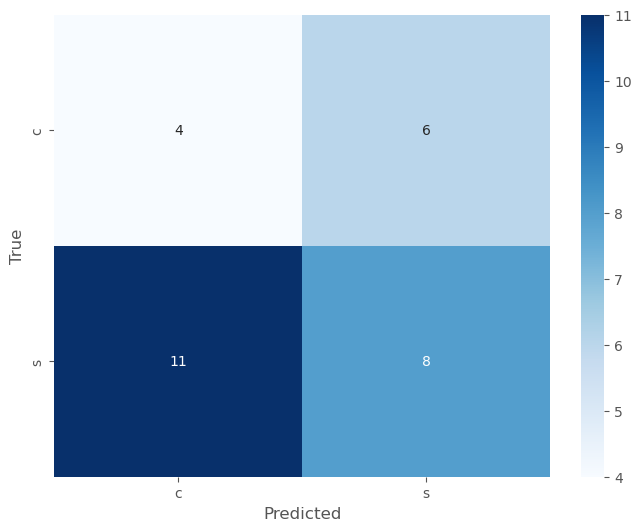

In [67]:
plot_confusion_matrix(y_test, y_pred_test, labels)

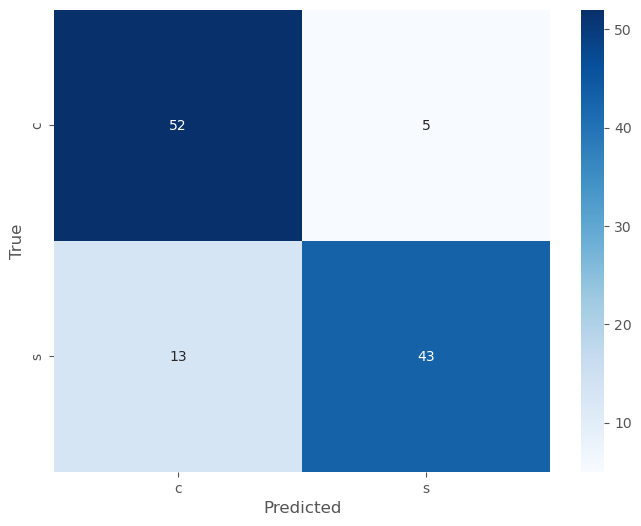

In [68]:
plot_confusion_matrix(y_train, y_pred_train, labels)

In [69]:
dtc_cv = cross_val_score(dtc, x_train, y_train, cv=10) 
print(dtc_cv.mean())

0.5553030303030303


In [70]:
dtc_cv = cross_val_score(dtc, x_test, y_test, cv=10) 
print(dtc_cv.mean())

0.3333333333333333


Random Forest

In [71]:
forest_reg = RandomForestClassifier(random_state=42)
forest_reg.fit(x_train, y_train)
forest_reg.score(x_test, y_test)

0.4482758620689655

In [72]:
forest_reg.score(x_train, y_train)

0.8407079646017699

In [73]:
y_pred_train = forest_reg.predict(x_train)
y_pred_test = forest_reg.predict(x_test)

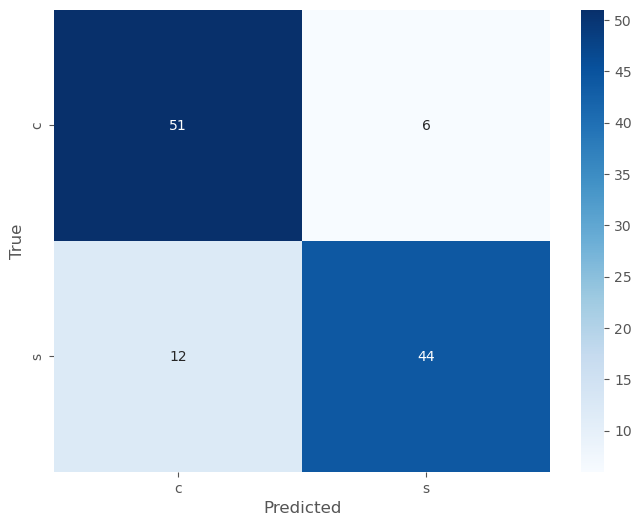

In [74]:
plot_confusion_matrix(y_train, y_pred_train, labels)

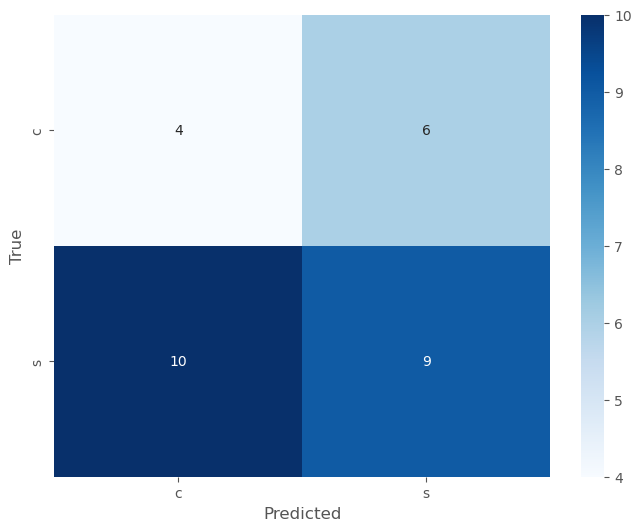

In [75]:
plot_confusion_matrix(y_test, y_pred_test, labels)

In [76]:
forest_reg_cv = cross_val_score(forest_reg, x_train, y_train, cv=10) 
print(forest_reg_cv.mean())  

0.546969696969697


In [77]:
forest_reg_cv = cross_val_score(forest_reg, x_test, y_test, cv=10) 
print(forest_reg_cv.mean()) 

0.4


AdaBoostClassifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier
adaboost.fit(x_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4482758620689655


In [79]:
y_pred = adaboost.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7699115044247787


In [81]:
adaboost_reg_cv = cross_val_score(adaboost, x_test, y_test, cv=10) 
print(adaboost_reg_cv.mean()) 

0.4333333333333333


In [82]:
adaboost_reg_cv = cross_val_score(adaboost, x_train, y_train, cv=10) 
print(adaboost_reg_cv.mean()) 

0.5196969696969697


xgboost

In [83]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert class labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=52)

# Train the classifier
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4482758620689655


In [84]:
y_pred = xgb_classifier.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8141592920353983


In [85]:
xgb_classifier_cv = cross_val_score(xgb_classifier, x_train, y_train, cv=10) 
print(xgb_classifier_cv.mean()) 

0.5121212121212121


In [86]:
xgb_classifier_cv = cross_val_score(xgb_classifier, x_test, y_test, cv=10) 
print(xgb_classifier_cv.mean()) 

0.33333333333333337


CatBoostClassifier

In [105]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a CatBoost classifier
catboost = CatBoostClassifier(iterations=100, random_state=42)

# Train the classifier
catboost.fit(x_train, y_train)

# Predict on the test set
y_pred = catboost.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Learning rate set to 0.033543
0:	learn: 0.6922202	total: 857us	remaining: 84.9ms
1:	learn: 0.6911772	total: 1.59ms	remaining: 77.8ms
2:	learn: 0.6893018	total: 2.3ms	remaining: 74.2ms
3:	learn: 0.6886369	total: 2.92ms	remaining: 70.1ms
4:	learn: 0.6878772	total: 3.52ms	remaining: 66.9ms
5:	learn: 0.6869529	total: 4.14ms	remaining: 64.8ms
6:	learn: 0.6859513	total: 4.79ms	remaining: 63.7ms
7:	learn: 0.6841603	total: 5.48ms	remaining: 63ms
8:	learn: 0.6832100	total: 6.13ms	remaining: 62ms
9:	learn: 0.6822138	total: 6.72ms	remaining: 60.5ms
10:	learn: 0.6812337	total: 7.3ms	remaining: 59ms
11:	learn: 0.6803128	total: 7.95ms	remaining: 58.3ms
12:	learn: 0.6797709	total: 8.59ms	remaining: 57.5ms
13:	learn: 0.6791979	total: 9.66ms	remaining: 59.4ms
14:	learn: 0.6790124	total: 10.2ms	remaining: 57.5ms
15:	learn: 0.6777642	total: 10.7ms	remaining: 56.4ms
16:	learn: 0.6767237	total: 11.4ms	remaining: 55.6ms
17:	learn: 0.6756271	total: 12ms	remaining: 54.9ms
18:	learn: 0.6751565	total: 12.6ms	re

In [106]:
y_pred

array(['s', 's', 's', 'c', 's', 's', 'c', 'c', 'c', 's', 'c', 's', 'c',
       'c', 's', 's', 'c', 's', 's', 'c', 's', 's', 'c', 's', 's', 'c',
       's', 'c', 's'], dtype=object)

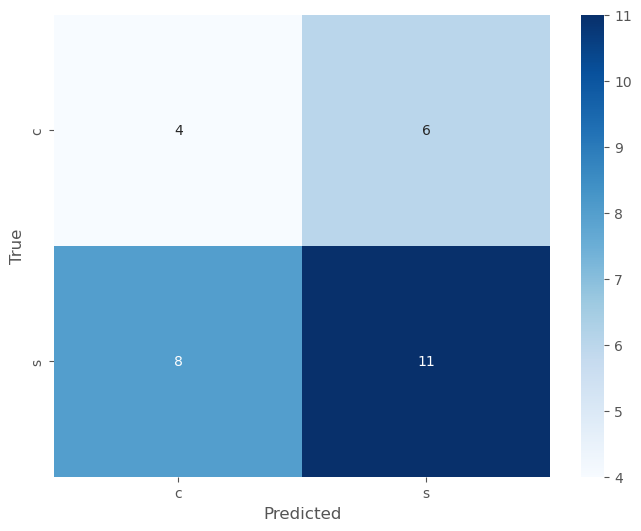

In [107]:
plot_confusion_matrix(y_test, y_pred, labels)

In [88]:
# Predict on the test set
y_pred = catboost.predict(x_train)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6991150442477876


In [89]:
catboost_CV = cross_val_score(catboost, x_test, y_test, cv=10) 
print(catboost_CV.mean()) 

Learning rate set to 0.017911
0:	learn: 0.6914042	total: 588us	remaining: 58.2ms
1:	learn: 0.6906095	total: 1.08ms	remaining: 52.9ms
2:	learn: 0.6898221	total: 1.57ms	remaining: 50.7ms
3:	learn: 0.6890490	total: 2ms	remaining: 47.9ms
4:	learn: 0.6880159	total: 2.42ms	remaining: 46ms
5:	learn: 0.6868177	total: 2.84ms	remaining: 44.5ms
6:	learn: 0.6854288	total: 3.19ms	remaining: 42.4ms
7:	learn: 0.6846768	total: 3.66ms	remaining: 42.1ms
8:	learn: 0.6840293	total: 4.1ms	remaining: 41.4ms
9:	learn: 0.6826650	total: 4.55ms	remaining: 41ms
10:	learn: 0.6816213	total: 4.88ms	remaining: 39.5ms
11:	learn: 0.6809316	total: 5.33ms	remaining: 39.1ms
12:	learn: 0.6801142	total: 5.79ms	remaining: 38.7ms
13:	learn: 0.6792924	total: 6.22ms	remaining: 38.2ms
14:	learn: 0.6781994	total: 6.48ms	remaining: 36.7ms
15:	learn: 0.6766437	total: 6.92ms	remaining: 36.3ms
16:	learn: 0.6752615	total: 7.46ms	remaining: 36.4ms
17:	learn: 0.6739884	total: 7.99ms	remaining: 36.4ms
18:	learn: 0.6725170	total: 8.44ms	

22:	learn: 0.6651637	total: 11.2ms	remaining: 37.6ms
23:	learn: 0.6639951	total: 12.2ms	remaining: 38.7ms
24:	learn: 0.6624739	total: 12.8ms	remaining: 38.4ms
25:	learn: 0.6613483	total: 13.5ms	remaining: 38.4ms
26:	learn: 0.6601282	total: 13.8ms	remaining: 37.3ms
27:	learn: 0.6589668	total: 14.3ms	remaining: 36.6ms
28:	learn: 0.6575945	total: 14.7ms	remaining: 36.1ms
29:	learn: 0.6568651	total: 15.2ms	remaining: 35.4ms
30:	learn: 0.6558241	total: 15.6ms	remaining: 34.8ms
31:	learn: 0.6547596	total: 16.1ms	remaining: 34.2ms
32:	learn: 0.6539867	total: 16.6ms	remaining: 33.7ms
33:	learn: 0.6530968	total: 16.8ms	remaining: 32.6ms
34:	learn: 0.6509195	total: 17.3ms	remaining: 32.1ms
35:	learn: 0.6500180	total: 17.7ms	remaining: 31.5ms
36:	learn: 0.6491518	total: 18.1ms	remaining: 30.8ms
37:	learn: 0.6480871	total: 18.3ms	remaining: 29.9ms
38:	learn: 0.6466627	total: 18.7ms	remaining: 29.3ms
39:	learn: 0.6450612	total: 19.2ms	remaining: 28.7ms
40:	learn: 0.6444502	total: 19.6ms	remaining: 

15:	learn: 0.6726624	total: 8.54ms	remaining: 44.8ms
16:	learn: 0.6713138	total: 9.13ms	remaining: 44.6ms
17:	learn: 0.6700474	total: 9.58ms	remaining: 43.7ms
18:	learn: 0.6684762	total: 10.2ms	remaining: 43.3ms
19:	learn: 0.6678402	total: 10.7ms	remaining: 42.7ms
20:	learn: 0.6671717	total: 11.2ms	remaining: 42.2ms
21:	learn: 0.6654438	total: 11.7ms	remaining: 41.4ms
22:	learn: 0.6645654	total: 12.1ms	remaining: 40.6ms
23:	learn: 0.6632563	total: 12.6ms	remaining: 39.8ms
24:	learn: 0.6619319	total: 13ms	remaining: 39ms
25:	learn: 0.6607277	total: 13.4ms	remaining: 38.2ms
26:	learn: 0.6595172	total: 13.7ms	remaining: 37ms
27:	learn: 0.6583541	total: 14.1ms	remaining: 36.2ms
28:	learn: 0.6569856	total: 14.5ms	remaining: 35.5ms
29:	learn: 0.6561880	total: 14.8ms	remaining: 34.6ms
30:	learn: 0.6552510	total: 15.2ms	remaining: 33.9ms
31:	learn: 0.6542621	total: 15.7ms	remaining: 33.3ms
32:	learn: 0.6532708	total: 16.1ms	remaining: 32.7ms
33:	learn: 0.6521462	total: 16.3ms	remaining: 31.6ms

13:	learn: 0.6793105	total: 8.23ms	remaining: 50.6ms
14:	learn: 0.6784372	total: 8.88ms	remaining: 50.3ms
15:	learn: 0.6771383	total: 9.34ms	remaining: 49ms
16:	learn: 0.6761833	total: 10.1ms	remaining: 49.3ms
17:	learn: 0.6745878	total: 10.6ms	remaining: 48.3ms
18:	learn: 0.6737200	total: 11.1ms	remaining: 47.2ms
19:	learn: 0.6727385	total: 11.4ms	remaining: 45.6ms
20:	learn: 0.6713868	total: 11.9ms	remaining: 44.7ms
21:	learn: 0.6702973	total: 12.4ms	remaining: 43.9ms
22:	learn: 0.6694550	total: 12.8ms	remaining: 42.8ms
23:	learn: 0.6682717	total: 13.2ms	remaining: 41.9ms
24:	learn: 0.6670202	total: 13.7ms	remaining: 41.1ms
25:	learn: 0.6656937	total: 14.7ms	remaining: 41.8ms
26:	learn: 0.6644810	total: 15.1ms	remaining: 40.7ms
27:	learn: 0.6634560	total: 16ms	remaining: 41.1ms
28:	learn: 0.6625488	total: 16.5ms	remaining: 40.3ms
29:	learn: 0.6614173	total: 16.9ms	remaining: 39.4ms
30:	learn: 0.6601288	total: 17.2ms	remaining: 38.3ms
31:	learn: 0.6595681	total: 17.7ms	remaining: 37.7

19:	learn: 0.6728807	total: 11ms	remaining: 43.9ms
20:	learn: 0.6720347	total: 11.7ms	remaining: 43.8ms
21:	learn: 0.6709818	total: 12.1ms	remaining: 42.9ms
22:	learn: 0.6702653	total: 12.7ms	remaining: 42.7ms
23:	learn: 0.6693534	total: 13.9ms	remaining: 44.1ms
24:	learn: 0.6681741	total: 15.1ms	remaining: 45.3ms
25:	learn: 0.6668833	total: 15.7ms	remaining: 44.6ms
26:	learn: 0.6659936	total: 15.9ms	remaining: 43ms
27:	learn: 0.6649576	total: 16.4ms	remaining: 42.1ms
28:	learn: 0.6642341	total: 16.9ms	remaining: 41.3ms
29:	learn: 0.6631666	total: 17.2ms	remaining: 40.1ms
30:	learn: 0.6620194	total: 17.5ms	remaining: 39ms
31:	learn: 0.6610090	total: 17.9ms	remaining: 37.9ms
32:	learn: 0.6603474	total: 18.3ms	remaining: 37.2ms
33:	learn: 0.6593276	total: 18.7ms	remaining: 36.2ms
34:	learn: 0.6585492	total: 19.2ms	remaining: 35.6ms
35:	learn: 0.6573788	total: 19.6ms	remaining: 34.8ms
36:	learn: 0.6567831	total: 19.8ms	remaining: 33.8ms
37:	learn: 0.6559778	total: 20.3ms	remaining: 33.1ms

In [90]:
catboost_CV = cross_val_score(catboost, x_train, y_train, cv=10) 
print(catboost_CV.mean()) 

Learning rate set to 0.031973
0:	learn: 0.6920522	total: 654us	remaining: 64.8ms
1:	learn: 0.6906717	total: 1.6ms	remaining: 78.2ms
2:	learn: 0.6894154	total: 2.38ms	remaining: 76.9ms
3:	learn: 0.6881936	total: 3.15ms	remaining: 75.6ms
4:	learn: 0.6872989	total: 3.74ms	remaining: 71.1ms
5:	learn: 0.6863930	total: 4.33ms	remaining: 67.8ms
6:	learn: 0.6849838	total: 4.88ms	remaining: 64.9ms
7:	learn: 0.6844382	total: 5.42ms	remaining: 62.4ms
8:	learn: 0.6832706	total: 5.99ms	remaining: 60.5ms
9:	learn: 0.6826683	total: 6.53ms	remaining: 58.8ms
10:	learn: 0.6819884	total: 7.09ms	remaining: 57.4ms
11:	learn: 0.6809728	total: 7.71ms	remaining: 56.5ms
12:	learn: 0.6808691	total: 8.09ms	remaining: 54.1ms
13:	learn: 0.6804760	total: 8.45ms	remaining: 51.9ms
14:	learn: 0.6792646	total: 8.99ms	remaining: 51ms
15:	learn: 0.6784573	total: 9.55ms	remaining: 50.1ms
16:	learn: 0.6772921	total: 10.1ms	remaining: 49.5ms
17:	learn: 0.6761464	total: 10.7ms	remaining: 48.6ms
18:	learn: 0.6750290	total: 11

Learning rate set to 0.031973
0:	learn: 0.6924601	total: 812us	remaining: 80.4ms
1:	learn: 0.6911853	total: 1.59ms	remaining: 78.2ms
2:	learn: 0.6893806	total: 2.3ms	remaining: 74.5ms
3:	learn: 0.6880828	total: 2.9ms	remaining: 69.7ms
4:	learn: 0.6866305	total: 3.65ms	remaining: 69.4ms
5:	learn: 0.6857864	total: 4.26ms	remaining: 66.7ms
6:	learn: 0.6848482	total: 4.81ms	remaining: 63.9ms
7:	learn: 0.6837998	total: 5.49ms	remaining: 63.1ms
8:	learn: 0.6829489	total: 6.17ms	remaining: 62.3ms
9:	learn: 0.6820410	total: 6.83ms	remaining: 61.5ms
10:	learn: 0.6810660	total: 7.58ms	remaining: 61.3ms
11:	learn: 0.6800904	total: 8.26ms	remaining: 60.6ms
12:	learn: 0.6788392	total: 9.79ms	remaining: 65.5ms
13:	learn: 0.6777851	total: 10.5ms	remaining: 64.3ms
14:	learn: 0.6772575	total: 11ms	remaining: 62.5ms
15:	learn: 0.6758482	total: 11.6ms	remaining: 60.8ms
16:	learn: 0.6739885	total: 12.2ms	remaining: 59.4ms
17:	learn: 0.6734162	total: 12.9ms	remaining: 58.7ms
18:	learn: 0.6723822	total: 13.

70:	learn: 0.6306898	total: 42.1ms	remaining: 17.2ms
71:	learn: 0.6300001	total: 42.8ms	remaining: 16.7ms
72:	learn: 0.6299049	total: 43.8ms	remaining: 16.2ms
73:	learn: 0.6294841	total: 44.7ms	remaining: 15.7ms
74:	learn: 0.6283832	total: 45.4ms	remaining: 15.1ms
75:	learn: 0.6277907	total: 46ms	remaining: 14.5ms
76:	learn: 0.6268426	total: 46.6ms	remaining: 13.9ms
77:	learn: 0.6263797	total: 47.2ms	remaining: 13.3ms
78:	learn: 0.6263022	total: 47.5ms	remaining: 12.6ms
79:	learn: 0.6257351	total: 48.1ms	remaining: 12ms
80:	learn: 0.6256257	total: 48.4ms	remaining: 11.4ms
81:	learn: 0.6243069	total: 49ms	remaining: 10.8ms
82:	learn: 0.6236599	total: 49.6ms	remaining: 10.2ms
83:	learn: 0.6234099	total: 50.2ms	remaining: 9.56ms
84:	learn: 0.6232910	total: 50.8ms	remaining: 8.96ms
85:	learn: 0.6230132	total: 51.1ms	remaining: 8.31ms
86:	learn: 0.6227204	total: 51.7ms	remaining: 7.72ms
87:	learn: 0.6222411	total: 52.3ms	remaining: 7.14ms
88:	learn: 0.6219562	total: 53ms	remaining: 6.55ms
8

41:	learn: 0.6573259	total: 25.8ms	remaining: 35.7ms
42:	learn: 0.6569963	total: 26.6ms	remaining: 35.3ms
43:	learn: 0.6566426	total: 27.2ms	remaining: 34.6ms
44:	learn: 0.6560639	total: 28ms	remaining: 34.2ms
45:	learn: 0.6557323	total: 28.6ms	remaining: 33.6ms
46:	learn: 0.6552977	total: 29.2ms	remaining: 33ms
47:	learn: 0.6549334	total: 29.8ms	remaining: 32.3ms
48:	learn: 0.6539175	total: 30.3ms	remaining: 31.5ms
49:	learn: 0.6532234	total: 30.8ms	remaining: 30.8ms
50:	learn: 0.6521073	total: 31.4ms	remaining: 30.1ms
51:	learn: 0.6515331	total: 31.9ms	remaining: 29.4ms
52:	learn: 0.6512865	total: 32.9ms	remaining: 29.2ms
53:	learn: 0.6509036	total: 33.7ms	remaining: 28.7ms
54:	learn: 0.6500648	total: 34.3ms	remaining: 28.1ms
55:	learn: 0.6493881	total: 34.8ms	remaining: 27.4ms
56:	learn: 0.6487765	total: 35.4ms	remaining: 26.7ms
57:	learn: 0.6483443	total: 35.9ms	remaining: 26ms
58:	learn: 0.6469724	total: 36.4ms	remaining: 25.3ms
59:	learn: 0.6464679	total: 36.9ms	remaining: 24.6ms

6:	learn: 0.6879577	total: 4.7ms	remaining: 62.4ms
7:	learn: 0.6864287	total: 5.7ms	remaining: 65.5ms
8:	learn: 0.6858091	total: 6.29ms	remaining: 63.6ms
9:	learn: 0.6852900	total: 6.95ms	remaining: 62.5ms
10:	learn: 0.6843819	total: 7.54ms	remaining: 61ms
11:	learn: 0.6830125	total: 8.17ms	remaining: 59.9ms
12:	learn: 0.6828661	total: 8.53ms	remaining: 57.1ms
13:	learn: 0.6827025	total: 8.89ms	remaining: 54.6ms
14:	learn: 0.6821587	total: 10.1ms	remaining: 57ms
15:	learn: 0.6816252	total: 10.9ms	remaining: 57.2ms
16:	learn: 0.6799497	total: 11.5ms	remaining: 56.2ms
17:	learn: 0.6789930	total: 12.1ms	remaining: 54.9ms
18:	learn: 0.6782344	total: 12.6ms	remaining: 53.7ms
19:	learn: 0.6773066	total: 13.1ms	remaining: 52.4ms
20:	learn: 0.6765851	total: 13.7ms	remaining: 51.5ms
21:	learn: 0.6762819	total: 14.3ms	remaining: 50.5ms
22:	learn: 0.6756262	total: 14.8ms	remaining: 49.5ms
23:	learn: 0.6747293	total: 15.3ms	remaining: 48.5ms
24:	learn: 0.6739227	total: 15.9ms	remaining: 47.6ms
25:

Learning rate set to 0.032107
0:	learn: 0.6922013	total: 624us	remaining: 61.8ms
1:	learn: 0.6910905	total: 1.26ms	remaining: 61.8ms
2:	learn: 0.6895698	total: 1.88ms	remaining: 60.6ms
3:	learn: 0.6885310	total: 2.41ms	remaining: 57.8ms
4:	learn: 0.6878839	total: 2.95ms	remaining: 56ms
5:	learn: 0.6864240	total: 3.47ms	remaining: 54.4ms
6:	learn: 0.6856878	total: 4.01ms	remaining: 53.3ms
7:	learn: 0.6844250	total: 4.57ms	remaining: 52.5ms
8:	learn: 0.6838095	total: 5.42ms	remaining: 54.9ms
9:	learn: 0.6832565	total: 6.13ms	remaining: 55.2ms
10:	learn: 0.6822499	total: 7.14ms	remaining: 57.8ms
11:	learn: 0.6811802	total: 7.68ms	remaining: 56.3ms
12:	learn: 0.6804999	total: 8.2ms	remaining: 54.9ms
13:	learn: 0.6795499	total: 8.73ms	remaining: 53.6ms
14:	learn: 0.6793675	total: 9.08ms	remaining: 51.4ms
15:	learn: 0.6776926	total: 9.71ms	remaining: 51ms
16:	learn: 0.6771774	total: 10.4ms	remaining: 50.9ms
17:	learn: 0.6758187	total: 11ms	remaining: 50.2ms
18:	learn: 0.6745866	total: 11.5ms

In [146]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Codificarea etichetelor
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)


In [117]:
y_train

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0])

In [148]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definiți dimensiunea seriei de timp (numărul de caracteristici de intrare)
input_dim = x_train.shape[1]

# Inițializați modelul LSTM
model = Sequential()

# Adăugați stratul LSTM
model.add(LSTM(64, input_shape=(None, input_dim)))  # Numărul de unități LSTM poate fi ajustat în funcție de cerințele dvs.

# Adăugați un strat de ieșire
model.add(Dense(1, activation='sigmoid'))  # Stratul de ieșire pentru clasificarea binară

# Compilați modelul
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Antrenați modelul
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
4/4 [==============================] - 3s 184ms/step - loss: 0.6927 - accuracy: 0.5398 - val_loss: 0.6970 - val_accuracy: 0.3448
Epoch 2/10
4/4 [==============================] - 0s 20ms/step - loss: 0.6924 - accuracy: 0.5487 - val_loss: 0.6974 - val_accuracy: 0.3448
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6924 - accuracy: 0.5398 - val_loss: 0.6981 - val_accuracy: 0.3448
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6923 - accuracy: 0.5398 - val_loss: 0.6986 - val_accuracy: 0.3448
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5398 - val_loss: 0.6992 - val_accuracy: 0.3448
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6922 - accuracy: 0.5398 - val_loss: 0.6993 - val_accuracy: 0.3448
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6922 - accuracy: 0.5398 - val_loss: 0.6992 - val_accuracy: 0.3448
Epoch 8/10
4/4 [==========

In [149]:
# Evaluarea modelului pe datele de testare
loss, accuracy = model.evaluate(x_test, y_test)

# Afișarea valorii de acuratețe
print('Acuratețe:', accuracy)


1/1 [==============================] - 0s 31ms/step - loss: 0.6995 - accuracy: 0.3448
Acuratețe: 0.3448275923728943


In [150]:
# Evaluarea modelului pe datele de testare
loss, accuracy = model.evaluate(x_train, y_train)

# Afișarea valorii de acuratețe
print('Acuratețe:', accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5487
Acuratețe: 0.5486725568771362


In [152]:
y_pred

array(['s', 's', 's', 'c', 's', 's', 'c', 'c', 'c', 's', 'c', 's', 'c',
       'c', 's', 's', 'c', 's', 's', 'c', 's', 's', 'c', 's', 's', 'c',
       's', 'c', 's'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inițializați obiectul LabelEncoder
label_encoder = LabelEncoder()

# Transformați etichetele în valori numerice
y_test = label_encoder.fit_transform(y_test)


In [138]:
labels = ['c','s']
labels

['c', 's']

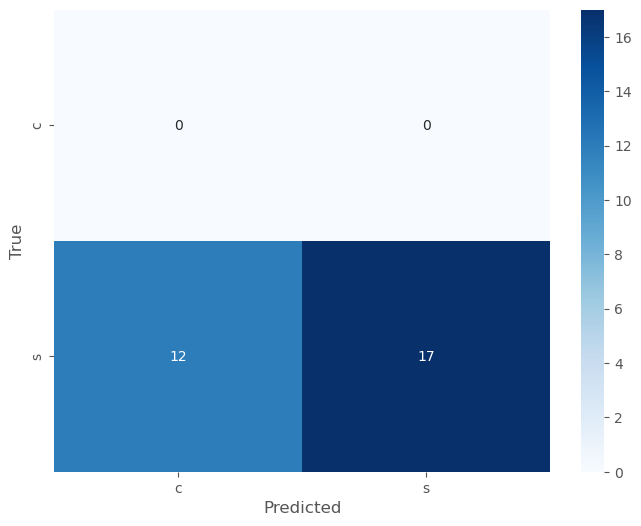

In [153]:
plot_confusion_matrix(y_test, y_pred, labels)

In [75]:
print("KNN: \t\t\t", neigh_cv.mean())
print("Logistic Regression: \t", logreg_cv.mean())
print("SVM linear: \t\t", svm_linear_cv.mean())
print("Naive Bayes: \t\t", mnb_cv.mean())
print("Decision Tree: \t\t", dtc_cv.mean())
print("Random Forest: \t\t", forest_reg_cv.mean())

KNN: 			 0.47727272727272724
Logistic Regression: 	 0.5022727272727273
SVM linear: 		 0.65
Naive Bayes: 		 0.5045454545454545
Decision Tree: 		 0.5553030303030303
Random Forest: 		 0.546969696969697


In [76]:
results = []
cv = [neigh_cv.mean(), logreg_cv.mean(), svm_linear_cv.mean(),mnb_cv.mean(),dtc_cv.mean(), forest_reg_cv.mean()]
results.append(cv)

In [77]:
results = {'0': ['KNN', 'LogReg', 'SVM linear', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
          '1':[neigh_cv.mean(), logreg_cv.mean(), svm_linear_cv.mean(), mnb_cv.mean(),dtc_cv.mean(),forest_reg_cv.mean()]}

In [78]:
summary = pd.DataFrame.from_dict(results)
summary = summary.transpose()
summary = summary.rename(index = {'0':'Model', '1':'AAL'}) 

In [79]:
summary

,0,1,2,3,4,5
Model,KNN,LogReg,SVM linear,Naive Bayes,Decision Tree,Random Forest
AAL,0.477273,0.502273,0.65,0.504545,0.555303,0.54697


PENTRU MODELE CU LAG

In [157]:
lag = 1
df['compound_lag'] = df['compound'].shift(lag)
df = df.dropna()

In [219]:
x = np.array(df[['compound_lag']])  # Variabila independentă cu lag
y = np.array(df['Directie'])  # Variabila dependentă


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [220]:
labels

['c', 's']

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train) 
neigh.score( x_test, y_test)

C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.3793103448275862

In [160]:
neigh.score(x_train, y_train)

C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6696428571428571

In [161]:
y_pred = neigh.predict(x_train)
y_pred

C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['c', 'c', 's', 's', 'c', 'c', 's', 'c', 'c', 'c', 's', 's', 'c',
       'c', 'c', 's', 's', 's', 's', 's', 's', 'c', 's', 's', 'c', 'c',
       's', 'c', 'c', 'c', 's', 's', 'c', 's', 'c', 'c', 's', 'c', 's',
       's', 's', 'c', 's', 's', 'c', 's', 's', 's', 's', 'c', 's', 'c',
       's', 'c', 'c', 's', 'c', 'c', 'c', 's', 's', 'c', 's', 'c', 'c',
       's', 's', 's', 'c', 's', 's', 'c', 's', 'c', 's', 'c', 's', 'c',
       'c', 'c', 's', 'c', 'c', 'c', 'c', 'c', 's', 'c', 's', 'c', 'c',
       's', 'c', 'c', 'c', 'c', 's', 's', 's', 's', 'c', 's', 'c', 's',
       'c', 'c', 'c', 's', 'c', 'c', 'c', 'c'], dtype=object)

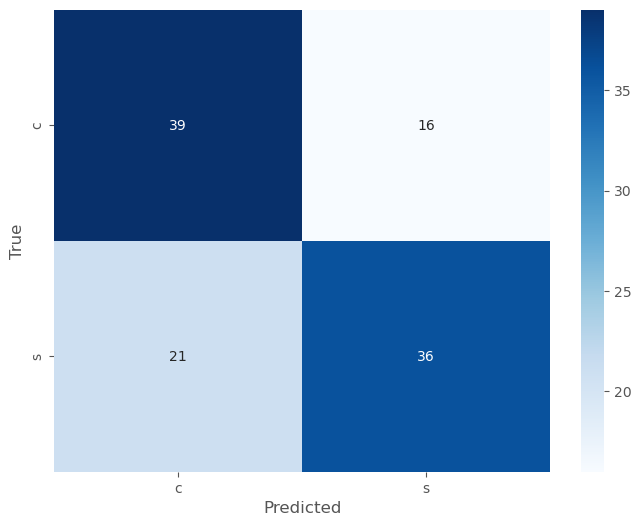

In [162]:
plot_confusion_matrix(y_train, y_pred, labels)

In [163]:
y_pred_test = neigh.predict(x_test)
y_pred_test

C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['c', 'c', 'c', 's', 's', 'c', 'c', 's', 'c', 'c', 'c', 'c', 'c',
       'c', 's', 's', 's', 's', 'c', 'c', 's', 'c', 'c', 's', 'c', 'c',
       'c', 'c', 'c'], dtype=object)

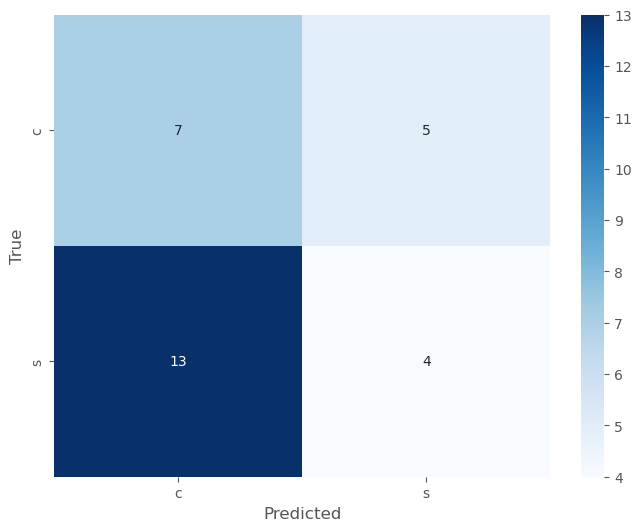

In [164]:
plot_confusion_matrix(y_test, y_pred_test, labels)

In [165]:
neigh_cv = cross_val_score(neigh, x_train, y_train, cv=10) 
print(neigh_cv.mean()) 

0.4833333333333332


C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

In [166]:
neigh_cv = cross_val_score(neigh, x_test, y_test, cv=10) 
print(neigh_cv.mean()) 

0.7166666666666666


C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Zoe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
logreg.score( x_test, y_test)

0.4482758620689655

In [168]:
logreg.score(x_train, y_train)

0.5357142857142857

In [169]:
y_pred_train = logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)

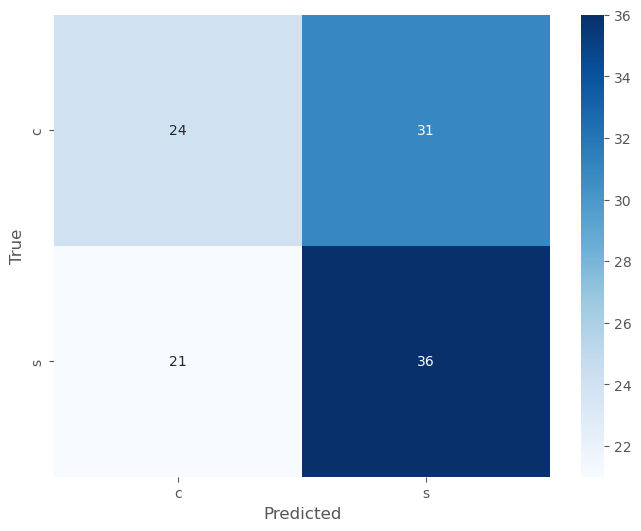

In [170]:
plot_confusion_matrix(y_train, y_pred_train, labels)

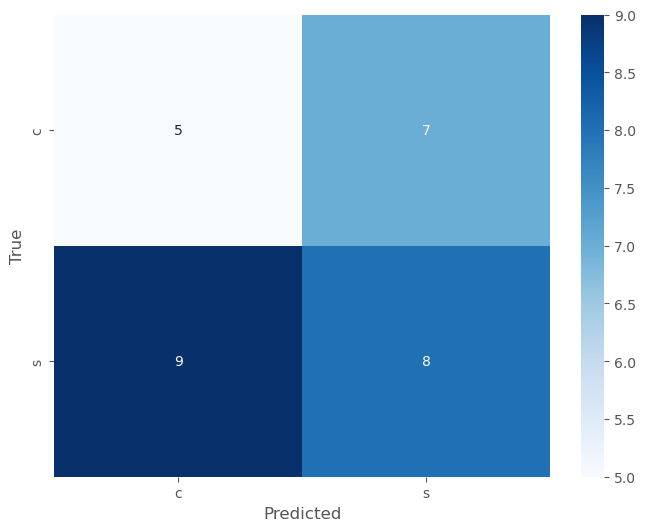

In [171]:
plot_confusion_matrix(y_test, y_pred_test, labels)

In [172]:
logreg_cv = cross_val_score(logreg, x_train, y_train, cv=10)
print(logreg_cv.mean())

0.49090909090909085


In [173]:
logreg_cv = cross_val_score(logreg, x_test, y_test, cv=10)
print(logreg_cv.mean())

0.6166666666666666


Support Vector Machines (SVM) with linear kernel

In [174]:
from sklearn.svm import SVC

svm_linear = SVC( kernel = 'linear')
svm_linear.fit(x_train, y_train)
svm_linear.score(x_test, y_test)

0.5862068965517241

In [175]:
svm_linear.score(x_train, y_train)

0.5089285714285714

In [176]:
y_pred_train = svm_linear.predict(x_train)
y_pred_test = svm_linear.predict(x_test)

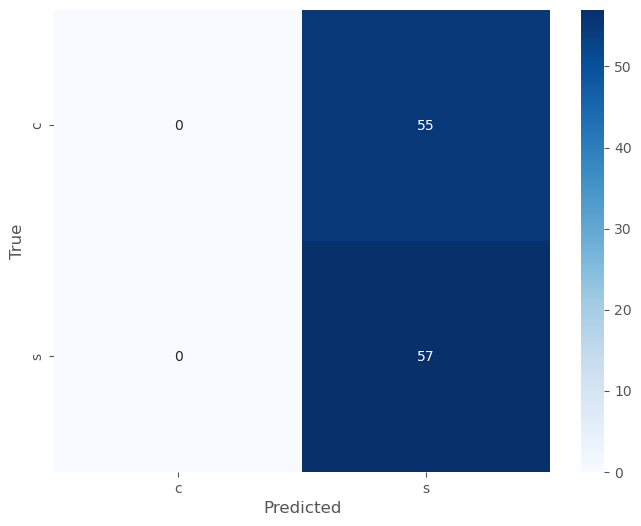

In [177]:
plot_confusion_matrix(y_train, y_pred_train, labels)

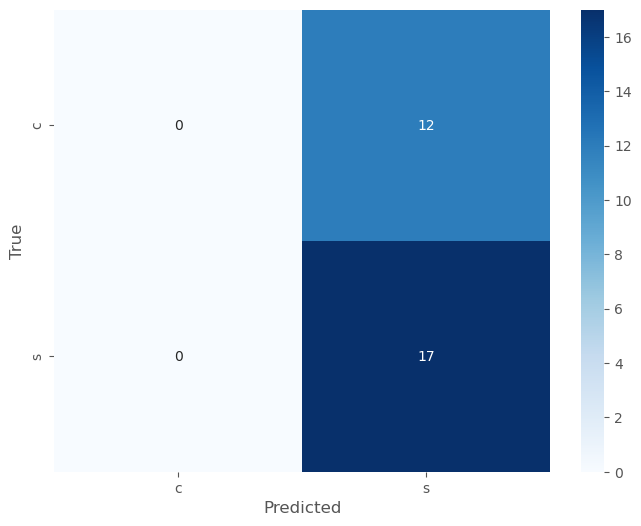

In [178]:
plot_confusion_matrix(y_test, y_pred_test, labels)

In [179]:
svm_linear_cv = cross_val_score(svm_linear, x_test, y_test, cv=10)
print(svm_linear_cv.mean())

0.7166666666666666


In [180]:
svm_linear_cv = cross_val_score(svm_linear, x_train, y_train, cv=10)
print(svm_linear_cv.mean())

0.4545454545454546


Naive Bayes

In [181]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_minmax = scaler.fit_transform(x_train)
X_minmax_test = scaler.fit_transform(x_test)
mnb = MultinomialNB()
mnb.fit(X_minmax, y_train)

MultinomialNB()

In [182]:
mnb.score(X_minmax_test, y_test)

0.5862068965517241

In [183]:
y_pred_train = mnb.predict(X_minmax)
y_pred_test = mnb.predict(X_minmax_test)

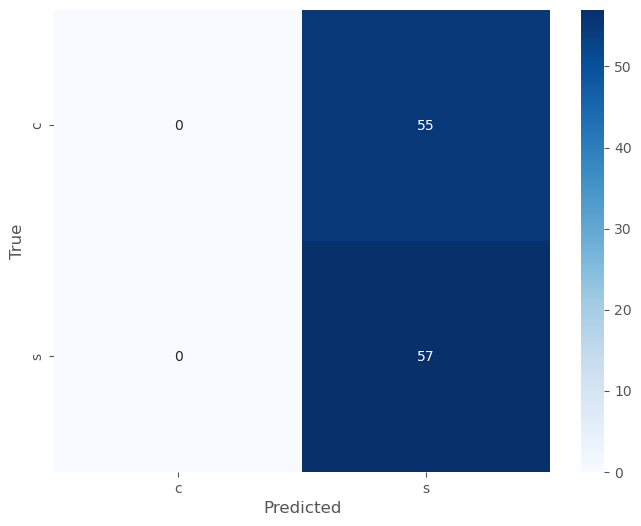

In [184]:
plot_confusion_matrix(y_train, y_pred_train, labels)

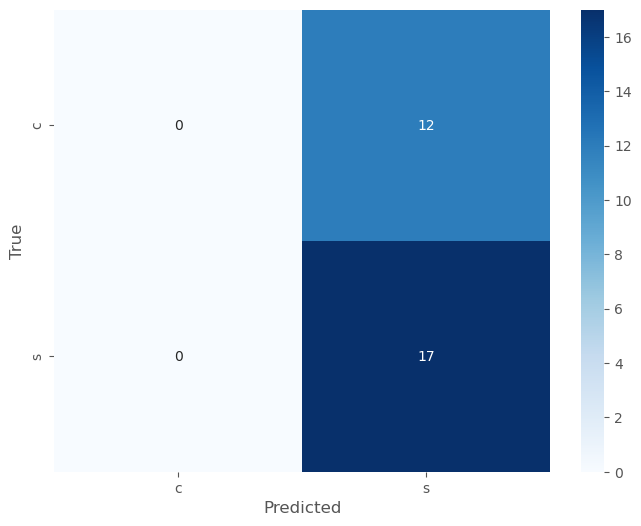

In [185]:
plot_confusion_matrix(y_test, y_pred_test, labels)

In [186]:
mnb_cv = cross_val_score(mnb, X_minmax, y_train, cv=10) 
print(mnb_cv.mean())

0.509090909090909


In [187]:
mnb_cv = cross_val_score(mnb, X_minmax_test, y_test, cv=10) 
print(mnb_cv.mean())

0.5833333333333333


Decision Tree

In [188]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train) 
dtc.score(x_test, y_test)

0.41379310344827586

In [189]:
dtc.score(x_train, y_train)

0.8125

In [190]:
y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

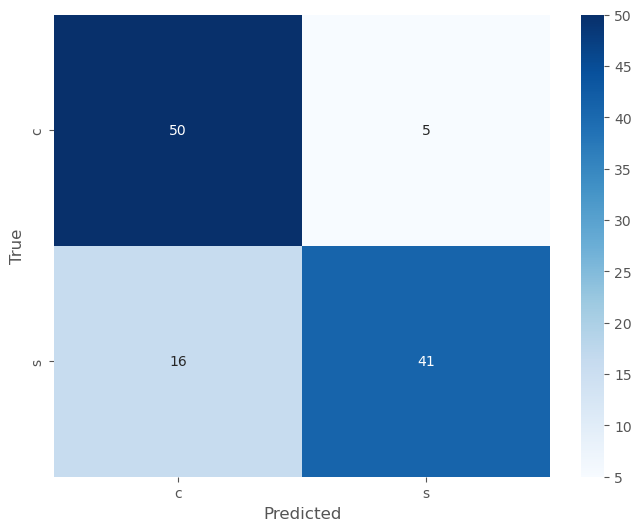

In [191]:
plot_confusion_matrix(y_train, y_pred_train, labels)

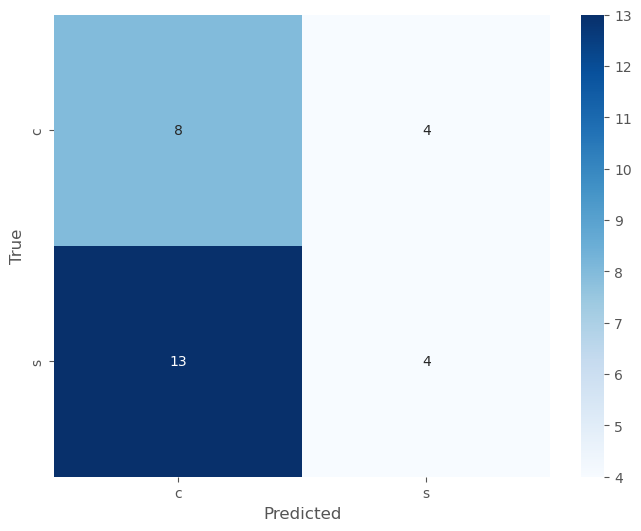

In [192]:
plot_confusion_matrix(y_test, y_pred_test, labels)

In [193]:
dtc_cv = cross_val_score(dtc, x_train, y_train, cv=10) 
print(dtc_cv.mean())

0.6416666666666666


In [194]:
dtc_cv = cross_val_score(dtc, x_test, y_test, cv=10) 
print(dtc_cv.mean())

0.6499999999999999


Random Forest

In [195]:
forest_reg = RandomForestClassifier(random_state=42)
forest_reg.fit(x_train, y_train)
forest_reg.score(x_test, y_test)

0.4482758620689655

In [196]:
forest_reg.score(x_train, y_train)

0.8125

In [197]:
y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

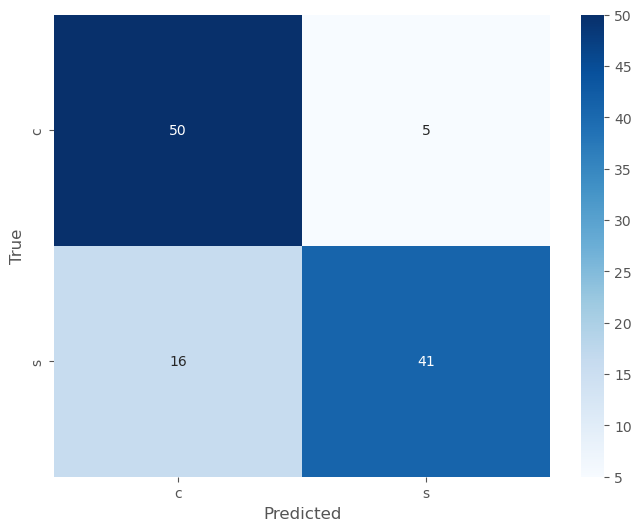

In [198]:
plot_confusion_matrix(y_train, y_pred_train, labels)

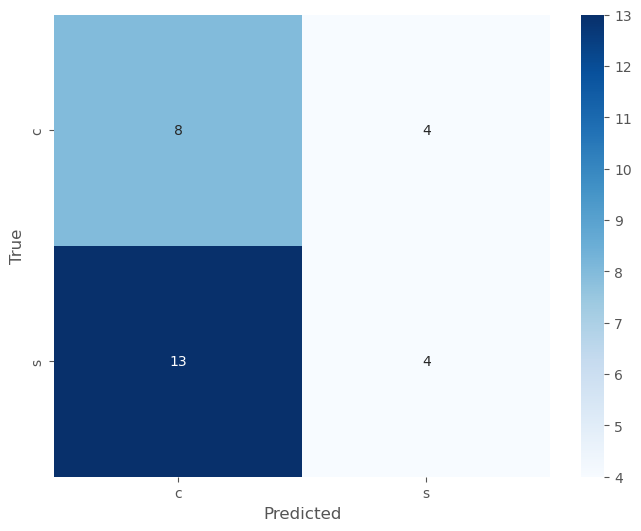

In [199]:
plot_confusion_matrix(y_test, y_pred_test, labels)

In [200]:
forest_reg_cv = cross_val_score(forest_reg, x_train, y_train, cv=10) 
print(forest_reg_cv.mean())  

0.5696969696969696


In [201]:
forest_reg_cv = cross_val_score(forest_reg, x_test, y_test, cv=10) 
print(forest_reg_cv.mean())  

0.6499999999999999


In [120]:
print("KNN: \t\t\t", neigh_cv.mean())
print("Logistic Regression: \t", logreg_cv.mean())
print("SVM linear: \t\t", svm_linear_cv.mean())
print("Naive Bayes: \t\t", mnb_cv.mean())
print("Decision Tree: \t\t", dtc_cv.mean())
print("Random Forest: \t\t", forest_reg_cv.mean())

KNN: 			 0.4833333333333332
Logistic Regression: 	 0.49090909090909085
SVM linear: 		 0.7166666666666666
Naive Bayes: 		 0.509090909090909
Decision Tree: 		 0.6416666666666666
Random Forest: 		 0.5696969696969696


In [121]:
results = []
cv = [neigh_cv.mean(), logreg_cv.mean(), svm_linear_cv.mean(),mnb_cv.mean(),dtc_cv.mean(), forest_reg_cv.mean()]
results.append(cv)

In [122]:
results = {'0': ['KNN', 'LogReg', 'SVM linear', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
          '1':[neigh_cv.mean(), logreg_cv.mean(), svm_linear_cv.mean(), mnb_cv.mean(),dtc_cv.mean(),forest_reg_cv.mean()]}

In [123]:
summary = pd.DataFrame.from_dict(results)
summary = summary.transpose()
summary = summary.rename(index = {'0':'Model', '1':'AAL'}) 

In [124]:
summary

,0,1,2,3,4,5
Model,KNN,LogReg,SVM linear,Naive Bayes,Decision Tree,Random Forest
AAL,0.483333,0.490909,0.716667,0.509091,0.641667,0.569697


Adaptative boosting

In [202]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create an AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier
adaboost.fit(x_train, y_train)

# Predict on the test set
y_pred = adaboost.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.41379310344827586


In [203]:
# Predict on the test set
y_pred = adaboost.predict(x_train)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7767857142857143


In [204]:
adaboost_cv = cross_val_score(adaboost, x_test, y_test, cv=10) 
print(adaboost_cv.mean())  

0.6833333333333333


In [205]:
adaboost_cv = cross_val_score(adaboost, x_train, y_train, cv=10) 
print(adaboost_cv.mean())  

0.5628787878787878


eXtrem Gradient Boosting

In [126]:
!pip install xgboost

In [206]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert class labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=52)

# Train the classifier
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.4827586206896552


In [128]:
y_pred = xgb_classifier.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7767857142857143


In [207]:
xgb_classifier_cv = cross_val_score(xgb_classifier, x_train, y_train, cv=10) 
print(xgb_classifier_cv.mean())  

0.5795454545454545


In [208]:
xgb_classifier_cv = cross_val_score(xgb_classifier, x_test, y_test, cv=10) 
print(xgb_classifier_cv.mean())  

0.75


Catboost

In [129]:
!pip install catboost

In [217]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a CatBoost classifier
catboost = CatBoostClassifier(iterations=100, random_state=42)

# Train the classifier
catboost.fit(x_train, y_train)

# Predict on the test set
y_pred = catboost.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Learning rate set to 0.033416
0:	learn: 0.6920463	total: 11.2ms	remaining: 1.11s
1:	learn: 0.6912379	total: 12ms	remaining: 587ms
2:	learn: 0.6898069	total: 12.6ms	remaining: 409ms
3:	learn: 0.6894702	total: 13.3ms	remaining: 318ms
4:	learn: 0.6886170	total: 14.7ms	remaining: 279ms
5:	learn: 0.6879574	total: 15.4ms	remaining: 242ms
6:	learn: 0.6863209	total: 15.9ms	remaining: 211ms
7:	learn: 0.6849713	total: 16.5ms	remaining: 190ms
8:	learn: 0.6848594	total: 17.1ms	remaining: 173ms
9:	learn: 0.6833318	total: 17.7ms	remaining: 159ms
10:	learn: 0.6823935	total: 18.3ms	remaining: 148ms
11:	learn: 0.6820346	total: 18.8ms	remaining: 138ms
12:	learn: 0.6811218	total: 19.1ms	remaining: 128ms
13:	learn: 0.6802795	total: 19.7ms	remaining: 121ms
14:	learn: 0.6797308	total: 20.4ms	remaining: 116ms
15:	learn: 0.6786314	total: 21.1ms	remaining: 111ms
16:	learn: 0.6781597	total: 21.4ms	remaining: 105ms
17:	learn: 0.6775259	total: 22ms	remaining: 100ms
18:	learn: 0.6771226	total: 22.6ms	remaining: 96

In [213]:
# Predict on the test set
y_pred = catboost.predict(x_train)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6517857142857143


In [211]:
catboost_cv = cross_val_score(catboost, x_test, y_test, cv=10) 
print(catboost_cv.mean())  

Learning rate set to 0.017911
0:	learn: 0.6920861	total: 609us	remaining: 60.3ms
1:	learn: 0.6895246	total: 1.11ms	remaining: 54.5ms
2:	learn: 0.6872077	total: 1.67ms	remaining: 53.9ms
3:	learn: 0.6854005	total: 2.19ms	remaining: 52.6ms
4:	learn: 0.6831120	total: 2.63ms	remaining: 50ms
5:	learn: 0.6799258	total: 3.29ms	remaining: 51.5ms
6:	learn: 0.6779132	total: 3.78ms	remaining: 50.2ms
7:	learn: 0.6766305	total: 4.24ms	remaining: 48.8ms
8:	learn: 0.6745763	total: 4.7ms	remaining: 47.6ms
9:	learn: 0.6731520	total: 5.13ms	remaining: 46.2ms
10:	learn: 0.6718943	total: 5.57ms	remaining: 45ms
11:	learn: 0.6709472	total: 6.01ms	remaining: 44.1ms
12:	learn: 0.6696462	total: 6.46ms	remaining: 43.2ms
13:	learn: 0.6683248	total: 6.93ms	remaining: 42.6ms
14:	learn: 0.6667717	total: 7.39ms	remaining: 41.9ms
15:	learn: 0.6651406	total: 7.88ms	remaining: 41.4ms
16:	learn: 0.6643452	total: 8.36ms	remaining: 40.8ms
17:	learn: 0.6628785	total: 8.84ms	remaining: 40.3ms
18:	learn: 0.6608434	total: 9.38

Learning rate set to 0.017911
0:	learn: 0.6916545	total: 583us	remaining: 57.8ms
1:	learn: 0.6894828	total: 1.03ms	remaining: 50.7ms
2:	learn: 0.6867941	total: 1.49ms	remaining: 48.3ms
3:	learn: 0.6845022	total: 1.92ms	remaining: 46.1ms
4:	learn: 0.6820675	total: 2.34ms	remaining: 44.5ms
5:	learn: 0.6791342	total: 2.74ms	remaining: 43ms
6:	learn: 0.6766399	total: 3.08ms	remaining: 40.9ms
7:	learn: 0.6739085	total: 3.49ms	remaining: 40.1ms
8:	learn: 0.6726121	total: 3.91ms	remaining: 39.5ms
9:	learn: 0.6708161	total: 4.32ms	remaining: 38.9ms
10:	learn: 0.6693408	total: 4.6ms	remaining: 37.2ms
11:	learn: 0.6667071	total: 5.02ms	remaining: 36.8ms
12:	learn: 0.6647792	total: 5.42ms	remaining: 36.3ms
13:	learn: 0.6629063	total: 5.83ms	remaining: 35.8ms
14:	learn: 0.6600813	total: 6.06ms	remaining: 34.4ms
15:	learn: 0.6582536	total: 6.51ms	remaining: 34.2ms
16:	learn: 0.6555088	total: 6.85ms	remaining: 33.5ms
17:	learn: 0.6534829	total: 7.66ms	remaining: 34.9ms
18:	learn: 0.6510560	total: 8.

Learning rate set to 0.017911
0:	learn: 0.6917647	total: 560us	remaining: 55.5ms
1:	learn: 0.6891899	total: 1.03ms	remaining: 50.6ms
2:	learn: 0.6870344	total: 1.45ms	remaining: 47ms
3:	learn: 0.6852883	total: 1.87ms	remaining: 44.9ms
4:	learn: 0.6830908	total: 2.72ms	remaining: 51.7ms
5:	learn: 0.6799456	total: 3.44ms	remaining: 53.8ms
6:	learn: 0.6781569	total: 3.96ms	remaining: 52.6ms
7:	learn: 0.6768798	total: 4.41ms	remaining: 50.8ms
8:	learn: 0.6749776	total: 4.83ms	remaining: 48.9ms
9:	learn: 0.6736395	total: 5.25ms	remaining: 47.3ms
10:	learn: 0.6723894	total: 5.66ms	remaining: 45.8ms
11:	learn: 0.6713555	total: 6.09ms	remaining: 44.7ms
12:	learn: 0.6700539	total: 6.52ms	remaining: 43.6ms
13:	learn: 0.6687419	total: 7.14ms	remaining: 43.8ms
14:	learn: 0.6674367	total: 7.69ms	remaining: 43.6ms
15:	learn: 0.6663215	total: 8.11ms	remaining: 42.6ms
16:	learn: 0.6652387	total: 8.39ms	remaining: 41ms
17:	learn: 0.6643580	total: 8.85ms	remaining: 40.3ms
18:	learn: 0.6638863	total: 9.1

Learning rate set to 0.017911
0:	learn: 0.6912112	total: 700us	remaining: 69.3ms
1:	learn: 0.6883149	total: 1.79ms	remaining: 87.7ms
2:	learn: 0.6857853	total: 2.41ms	remaining: 78ms
3:	learn: 0.6836770	total: 2.93ms	remaining: 70.3ms
4:	learn: 0.6797176	total: 4.62ms	remaining: 87.7ms
5:	learn: 0.6771011	total: 5.16ms	remaining: 80.8ms
6:	learn: 0.6741740	total: 5.97ms	remaining: 79.4ms
7:	learn: 0.6726722	total: 6.57ms	remaining: 75.5ms
8:	learn: 0.6700820	total: 7.28ms	remaining: 73.6ms
9:	learn: 0.6676814	total: 7.93ms	remaining: 71.4ms
10:	learn: 0.6657488	total: 8.58ms	remaining: 69.4ms
11:	learn: 0.6637232	total: 9.08ms	remaining: 66.6ms
12:	learn: 0.6618847	total: 9.64ms	remaining: 64.5ms
13:	learn: 0.6599970	total: 12.9ms	remaining: 79ms
14:	learn: 0.6576076	total: 13.3ms	remaining: 75.2ms
15:	learn: 0.6561986	total: 13.8ms	remaining: 72.3ms
16:	learn: 0.6538776	total: 14.2ms	remaining: 69.3ms
17:	learn: 0.6512989	total: 14.8ms	remaining: 67.3ms
18:	learn: 0.6490682	total: 15.

Learning rate set to 0.017911
0:	learn: 0.6910862	total: 587us	remaining: 58.1ms
1:	learn: 0.6881379	total: 1.17ms	remaining: 57.5ms
2:	learn: 0.6847039	total: 1.66ms	remaining: 53.7ms
3:	learn: 0.6822872	total: 2.11ms	remaining: 50.7ms
4:	learn: 0.6797713	total: 2.52ms	remaining: 47.8ms
5:	learn: 0.6764818	total: 3.01ms	remaining: 47.2ms
6:	learn: 0.6741862	total: 3.45ms	remaining: 45.8ms
7:	learn: 0.6716157	total: 3.9ms	remaining: 44.8ms
8:	learn: 0.6702225	total: 4.43ms	remaining: 44.8ms
9:	learn: 0.6679565	total: 4.89ms	remaining: 44ms
10:	learn: 0.6663093	total: 5.16ms	remaining: 41.8ms
11:	learn: 0.6635985	total: 5.63ms	remaining: 41.3ms
12:	learn: 0.6615386	total: 6.07ms	remaining: 40.6ms
13:	learn: 0.6598119	total: 6.54ms	remaining: 40.2ms
14:	learn: 0.6562228	total: 6.84ms	remaining: 38.8ms
15:	learn: 0.6546192	total: 7.34ms	remaining: 38.5ms
16:	learn: 0.6525738	total: 7.82ms	remaining: 38.2ms
17:	learn: 0.6504741	total: 8.27ms	remaining: 37.7ms
18:	learn: 0.6485082	total: 8.

In [212]:
catboost_cv = cross_val_score(catboost, x_train, y_train, cv=10) 
print(catboost_cv.mean())  

Learning rate set to 0.031837
0:	learn: 0.6924928	total: 644us	remaining: 63.8ms
1:	learn: 0.6914215	total: 1.59ms	remaining: 78.2ms
2:	learn: 0.6905170	total: 2.1ms	remaining: 67.9ms
3:	learn: 0.6897952	total: 2.58ms	remaining: 62ms
4:	learn: 0.6888944	total: 3.07ms	remaining: 58.4ms
5:	learn: 0.6879281	total: 3.59ms	remaining: 56.3ms
6:	learn: 0.6874209	total: 4.17ms	remaining: 55.5ms
7:	learn: 0.6870032	total: 4.56ms	remaining: 52.5ms
8:	learn: 0.6863104	total: 5.08ms	remaining: 51.4ms
9:	learn: 0.6857172	total: 5.61ms	remaining: 50.5ms
10:	learn: 0.6839965	total: 6.5ms	remaining: 52.6ms
11:	learn: 0.6832281	total: 7.54ms	remaining: 55.3ms
12:	learn: 0.6821854	total: 8.06ms	remaining: 53.9ms
13:	learn: 0.6819684	total: 8.37ms	remaining: 51.4ms
14:	learn: 0.6810390	total: 8.87ms	remaining: 50.3ms
15:	learn: 0.6799512	total: 9.37ms	remaining: 49.2ms
16:	learn: 0.6793526	total: 9.88ms	remaining: 48.2ms
17:	learn: 0.6789174	total: 10.4ms	remaining: 47.2ms
18:	learn: 0.6774939	total: 10.

5:	learn: 0.6874692	total: 3.98ms	remaining: 62.4ms
6:	learn: 0.6871834	total: 4.54ms	remaining: 60.4ms
7:	learn: 0.6863170	total: 5.41ms	remaining: 62.2ms
8:	learn: 0.6849061	total: 6.22ms	remaining: 62.9ms
9:	learn: 0.6836044	total: 6.88ms	remaining: 61.9ms
10:	learn: 0.6823468	total: 10.2ms	remaining: 82.4ms
11:	learn: 0.6816118	total: 10.8ms	remaining: 79.1ms
12:	learn: 0.6810858	total: 11.3ms	remaining: 75.8ms
13:	learn: 0.6807887	total: 11.7ms	remaining: 71.7ms
14:	learn: 0.6801372	total: 12.3ms	remaining: 69.5ms
15:	learn: 0.6791469	total: 12.9ms	remaining: 67.7ms
16:	learn: 0.6773878	total: 13.5ms	remaining: 65.9ms
17:	learn: 0.6758664	total: 14.1ms	remaining: 64.1ms
18:	learn: 0.6748592	total: 14.7ms	remaining: 62.5ms
19:	learn: 0.6737808	total: 15.2ms	remaining: 60.9ms
20:	learn: 0.6732054	total: 15.9ms	remaining: 60ms
21:	learn: 0.6727339	total: 16.7ms	remaining: 59.1ms
22:	learn: 0.6721502	total: 17.2ms	remaining: 57.7ms
23:	learn: 0.6719518	total: 17.9ms	remaining: 56.6ms


Learning rate set to 0.031973
0:	learn: 0.6920287	total: 1.2ms	remaining: 119ms
1:	learn: 0.6910555	total: 1.94ms	remaining: 95.3ms
2:	learn: 0.6897578	total: 2.54ms	remaining: 82.2ms
3:	learn: 0.6890424	total: 3.07ms	remaining: 73.7ms
4:	learn: 0.6875760	total: 3.63ms	remaining: 69.1ms
5:	learn: 0.6870636	total: 4.2ms	remaining: 65.8ms
6:	learn: 0.6856943	total: 4.73ms	remaining: 62.8ms
7:	learn: 0.6853588	total: 5.17ms	remaining: 59.5ms
8:	learn: 0.6843430	total: 5.7ms	remaining: 57.6ms
9:	learn: 0.6832930	total: 6.33ms	remaining: 56.9ms
10:	learn: 0.6817143	total: 7.17ms	remaining: 58ms
11:	learn: 0.6811933	total: 7.66ms	remaining: 56.2ms
12:	learn: 0.6804984	total: 8ms	remaining: 53.6ms
13:	learn: 0.6797616	total: 8.54ms	remaining: 52.4ms
14:	learn: 0.6790033	total: 9.09ms	remaining: 51.5ms
15:	learn: 0.6785166	total: 9.67ms	remaining: 50.8ms
16:	learn: 0.6774397	total: 10.2ms	remaining: 49.6ms
17:	learn: 0.6765104	total: 10.7ms	remaining: 48.7ms
18:	learn: 0.6758977	total: 11.7ms	

Learning rate set to 0.031973
0:	learn: 0.6920808	total: 746us	remaining: 73.9ms
1:	learn: 0.6912275	total: 1.12ms	remaining: 54.7ms
2:	learn: 0.6907095	total: 2.32ms	remaining: 74.9ms
3:	learn: 0.6899216	total: 2.7ms	remaining: 64.8ms
4:	learn: 0.6898176	total: 2.89ms	remaining: 55ms
5:	learn: 0.6886801	total: 3.35ms	remaining: 52.4ms
6:	learn: 0.6881814	total: 3.86ms	remaining: 51.3ms
7:	learn: 0.6871664	total: 4.42ms	remaining: 50.8ms
8:	learn: 0.6866756	total: 4.77ms	remaining: 48.2ms
9:	learn: 0.6855124	total: 5.3ms	remaining: 47.7ms
10:	learn: 0.6849200	total: 5.86ms	remaining: 47.4ms
11:	learn: 0.6839705	total: 6.36ms	remaining: 46.7ms
12:	learn: 0.6834034	total: 6.82ms	remaining: 45.7ms
13:	learn: 0.6821122	total: 7.34ms	remaining: 45.1ms
14:	learn: 0.6811589	total: 7.89ms	remaining: 44.7ms
15:	learn: 0.6804026	total: 8.31ms	remaining: 43.6ms
16:	learn: 0.6794144	total: 8.84ms	remaining: 43.2ms
17:	learn: 0.6782327	total: 9.39ms	remaining: 42.8ms
18:	learn: 0.6769725	total: 9.9

85:	learn: 0.6301733	total: 52.5ms	remaining: 8.54ms
86:	learn: 0.6299570	total: 53.5ms	remaining: 7.99ms
87:	learn: 0.6296816	total: 54.2ms	remaining: 7.39ms
88:	learn: 0.6294143	total: 54.8ms	remaining: 6.77ms
89:	learn: 0.6293485	total: 55.4ms	remaining: 6.16ms
90:	learn: 0.6289586	total: 56ms	remaining: 5.54ms
91:	learn: 0.6285987	total: 56.6ms	remaining: 4.92ms
92:	learn: 0.6284013	total: 57.2ms	remaining: 4.3ms
93:	learn: 0.6282016	total: 57.8ms	remaining: 3.69ms
94:	learn: 0.6274979	total: 58.4ms	remaining: 3.07ms
95:	learn: 0.6269648	total: 59ms	remaining: 2.46ms
96:	learn: 0.6265440	total: 59.5ms	remaining: 1.84ms
97:	learn: 0.6258965	total: 60ms	remaining: 1.23ms
98:	learn: 0.6254343	total: 60.6ms	remaining: 611us
99:	learn: 0.6248661	total: 61.1ms	remaining: 0us
Learning rate set to 0.031973
0:	learn: 0.6916611	total: 705us	remaining: 69.9ms
1:	learn: 0.6905801	total: 1.27ms	remaining: 62.5ms
2:	learn: 0.6895952	total: 1.81ms	remaining: 58.5ms
3:	learn: 0.6890562	total: 2.34

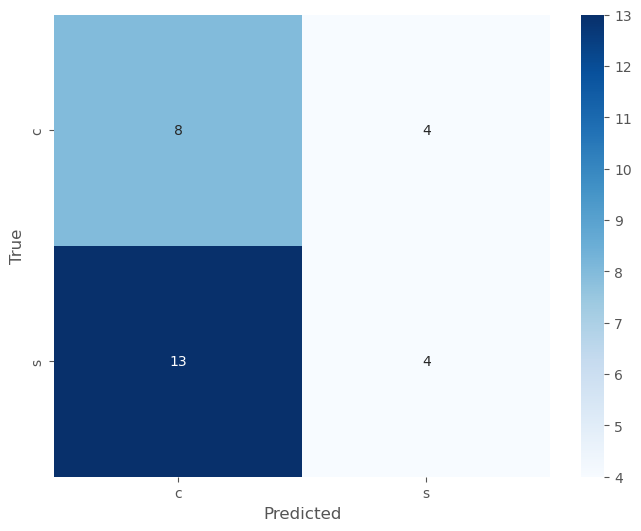

In [221]:
plot_confusion_matrix(y_test, y_pred_test, labels)

LSTM

In [214]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definiți dimensiunea seriei de timp (numărul de caracteristici de intrare)
input_dim = x_train.shape[1]

# Inițializați modelul LSTM
model = Sequential()

# Adăugați stratul LSTM
model.add(LSTM(64, input_shape=(None, input_dim)))  # Numărul de unități LSTM poate fi ajustat în funcție de cerințele dvs.

# Adăugați un strat de ieșire
model.add(Dense(1, activation='sigmoid'))  # Stratul de ieșire pentru clasificarea binară

# Compilați modelul
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Antrenați modelul
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
4/4 [==============================] - 4s 233ms/step - loss: 0.6930 - accuracy: 0.5089 - val_loss: 0.7011 - val_accuracy: 0.3448
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 0.6929 - accuracy: 0.4911 - val_loss: 0.7005 - val_accuracy: 0.3448
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 0.6928 - accuracy: 0.4911 - val_loss: 0.7003 - val_accuracy: 0.3448
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.4911 - val_loss: 0.7000 - val_accuracy: 0.3448
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 0.6927 - accuracy: 0.4821 - val_loss: 0.6994 - val_accuracy: 0.3448
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4732 - val_loss: 0.6987 - val_accuracy: 0.3448
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.5179 - val_loss: 0.6981 - val_accuracy: 0.3793
Epoch 8/10
4/4 [==========

In [215]:
# Evaluarea modelului pe datele de testare
loss, accuracy = model.evaluate(x_train, y_train)

# Afișarea valorii de acuratețe
print('Acuratețe:', accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5536
Acuratețe: 0.5535714030265808


ANALIZA CLUSTER

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [36]:
import numpy as np
from sklearn.cluster import KMeans


# Create a KMeans instance
kmeans = KMeans(n_clusters=3)

# Fit the data to the KMeans model
kmeans.fit(df[['compound', 'RI']])

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

In [37]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
centers = kmeans.cluster_centers_

In [39]:
centers

array([[ 0.32822879,  1.67984848],
       [ 0.43015522,  6.59328358],
       [ 0.33311111, 14.71888889]])